# Transfer Learning and Fine-Tuning


---

In this second exercise, we will learn how to apply fine-tuning on a model which is just an extension of transfer learning.

This exercise is split in several parts:
1.   Loading and Exploring Dataset
2.   Preparing Dataset
3.   Defining the Architecture of CNN
4.   Training and Evaluation of the Model
5.   Analysing the Results

# Predicting cats versus dogs (binary classification)

## Dataset 

The dataset we will be using is the Cats vs Dogs.

The data was originally shared by Microsoft in 2017.

Each observation is a color image representing either a dog or a cat..

The original dataset is avalaible here: [cats vs dogs](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip)


## Objective

Our goal is to use a pre-trained Convolution Neural Network model and assess its performance then we will fine-tune it and see the impact. 

## Instructions

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:
1.   Loading and Exploration of the Dataset
2.   Preparing the Dataset
3.   Load a pre-trained VGG16 model
4.   Training and Evaluation of the VGG16 model

## Exercise 1 Solution

In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


### 1. Loading and exploring the Dataset

**[1.1]** 
First we need to download locally the zip file from the link provided earlier. We will be using the [get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) method from Tensorflow. The result of this method is the directory where the file has been downloaded.

##### Task: import tensorflow and download the dataset locally

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: import tensorflow and download the dataset locally

In [ ]:
# SOLUTION
import tensorflow as tf
file_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=file_url, extract=True)
zip_dir

68616192/68606236 [==============================] - 1s 0us/step


'/root/.keras/datasets/cats_and_dogs_filtered.zip'

**[1.2]** 
The method get_file() has already unzipped the file locally in the parent folder of the zip file.

##### Task: Find the parent folder of the zip file and store it into variable called parent_dir

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Find the parent folder of the zip file and store it into variable called parent_dir

In [2]:
# SOLUTION
import pathlib
parent_dir = pathlib.Path(zip_dir).parent

NameError: name 'zip_dir' is not defined

**[1.3]** 
The images are already split into a 'train' and 'validation' folders under 'cats_and_dogs_filtered'

##### Task: Create 2 variable called train_dir and test_dir that will contain the path to the 'train' and 'validation' folders

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Create 2 variable called train_dir and test_dir that will contain the path to the 'train' and 'validation' folders

In [ ]:
train_dir = parent_dir / 'cats_and_dogs_filtered' / 'train'
test_dir = parent_dir / 'cats_and_dogs_filtered' / 'validation'

### 2.   Preparing the Dataset

**[2.1]** We first need to create an [ImageDataGenerator()](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). This time we will not only normalise the images but we will also perform some data transformation: rescale=1./255, rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'

##### Task: Import ImageDataGenerator and create an image generator for the training set

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Import ImageDataGenerator and create an image generator for the training set

In [ ]:
# SOLUTION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_img_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

**[2.2]** Now we need to create the image data generator for the testing set

##### Task: create an image generator for the testing set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: create an image generator for the testing set

In [ ]:
# SOLUTION
test_img_gen = ImageDataGenerator(rescale=1./255)

**[2.3]** Now we need to define the batch size for the data generators. For this dataset we will set it as 20.

##### Task: create a variable containing the batch size value

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: create a variable containing the batch size value

In [ ]:
# SOLUTION
batch_size=20

**[2.4]** Now we can define our data generator by specifying its input stream. For this dataset, we will use the method [.flow_from_directory()](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) that reads images from folders directly.

##### Task: create a data generator for the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: create a data generator for the training set

In [ ]:
# SOLUTION
train_data_gen = train_img_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(100, 100), class_mode='binary')

Found 2000 images belonging to 2 classes.


**[2.5]** Now we can create the data generator for the testing set

##### Task: create a data generator for the testing set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: create a data generator for the testing set

In [ ]:
# SOLUTION
test_data_gen = test_img_gen.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(100, 100), class_mode='binary')

Found 1000 images belonging to 2 classes.


**[2.5]** Let's create 2 variables containing the number of images for each set. This will be useful for fitting the model 

##### Task: create 2 variables called 'total_train' and 'total_val' that contain the number of images for the training and testing sets

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: create 2 variables called 'total_train' and 'total_val' that contain the number of images for the training and testing sets

In [ ]:
# SOLUTION
total_train = 2000
total_val = 1000

### 3.   Defining the Architecture of CNN

**[3.1]** First we need to import the [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) architecture

In [ ]:
from tensorflow.keras.applications import VGG16

**[3.2]** Let's specify the dimensions of the input images

##### Task: create a tuple called input_shape that will contains the height, width and number of channels of the input images)

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: create a tuple called input_shape that will contains the height, width and number of channels of the input images)

In [ ]:
# SOLUTION
input_shape = (100, 100, 3)

**[3.3]** Then we will instantiate this model by specifying the input image dimensions, the pre-trained weights from ImageNet and will not include the top layers as we are using a dataset with 2 classes (ImageNet has 200 classes).

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate a pre-trained VGG16 model

In [ ]:
base_model = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


**[3.4]** Now let's set a threshold that will define which layer we will train onward.

###### Task: Create a variable called frozen_layers with the value 15

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a variable called frozen_layers with the value 15

In [ ]:
# SOLUTION
frozen_layers = 15

**[3.5]** We will set all the [layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) up to the value in frozen_layers as non-trainable. By default all layers are trainable so we just need to "freeze" the layers we want.

###### Task: Create a for loop that will iterate through the layers of base_model up to the value of frozen_layers and set each of them as non-trainable

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Create a for loop that will iterate through the layers of base_model up to the value of frozen_layers and set each of them as non-trainable

In [ ]:
# SOLUTION
for layer in base_model.layers[:frozen_layers]:
    layer.trainable = False

**[3.6]** Let's have a look at this model by displaying its summary with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

##### Task: Print the summary of our model

In [ ]:
# Placeholder for student's code (1 line of code)
##### Task: Print the summary of our model

In [ ]:
# SOLUTION
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

**[3.7]** Let's add 2 fully connected layers to this VGG16 model.

##### Task: Create a new model by combining the VGG16 model to 2 fully connnected layers (the first one will have 500 units)

In [ ]:
# Placeholder for student's code (5 lines of code)
# Task: Create a new model by combining the VGG16 model to 2 fully connnected layers (the first one will have 500 units)

In [ ]:
# SOLUTION
from tensorflow.keras.layers import Flatten, Dense

tuned_model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')
])

**[3.8]** We will now instantiate the [Adam()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) class. We will specify the learning rate as 0.000001.

##### Task: Create an Adam optimiser

In [ ]:
# Placeholder for student's code (1 lines of code)
# Task: Create an Adam optimiser

In [ ]:
# SOLUTION
optimizer = tf.keras.optimizers.Adam(0.00001)

**[3.9]** Now that we have a defined architecture, we need to configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer to be used and the metrics to be displayed. 

##### Task: Define the relevant loss function and metrics for the compile method

In [ ]:
# Placeholder for student's code (1 lines of code)
# Task: Define the relevant loss function and metrics for the compile method

In [ ]:
# SOLUTION
tuned_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**[3.10]** Let's have a look at this model by displaying its summary with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

##### Task: Print the summary of our model

In [ ]:
# Placeholder for student's code (1 line of code)
##### Task: Print the summary of our model

In [ ]:
# SOLUTION
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 500)               2304500   
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 17,019,689
Trainable params: 9,384,425
Non-trainable params: 7,635,264
_________________________________________________________________


### 4. Training and Evaluation of the Model

**[4.1]** Import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint modules from tensorflow.keras.callbacks

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint modules from tensorflow.keras.callbacks

In [ ]:
# Solution
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

**[4.2]** Instantiate an EarlyStopping callback that will stop the learning process if the model doesn't improve after 5 epochs 

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate an EarlyStopping callback that will stop the learning process if the model doesn't improve after 5 epochs 

In [ ]:
# Solution
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

**[4.3]** Instantiate a ReduceLROnPlateau callback that will decrease the learning rate by a factor of 0.2 if the model doesn't improve after 3 epochs 

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate a ReduceLROnPlateau callback that will decrease the learning rate by a factor of 0.2 if the model doesn't improve after 3 epochs

In [ ]:
# Solution
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0000001)

**[4.4]** Create a variable called `checkpoint_filepath` with the value './vgg_checkpoint'

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a variable called checkpoint_filepath with the value './vgg_checkpoint'

In [ ]:
# Solution
checkpoint_filepath = './vgg_checkpoint'

**[4.5]** Instantiate a ModelCheckpoint callback that will save the best model weights during the learning process

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate a ModelCheckpoint callback that will save the best model weights during the learning process

In [ ]:
# Solution
model_checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

**[4.6]** Let's train our model. You can achieve this by calling the [.fit_generator()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit_generator) method. This will take as input the data generators we created earlier. We need to also define the number of steps per epoch whoch corresponds the number of batches. We will run it for 5 epochs (the training will take some time).

##### Task: Train the CNN model for 50 epochs

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Train the CNN model for 50 epochs

In [ ]:
# SOLUTION
history = tuned_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=50,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[early_stop_cb, reduce_lr, model_checkpoint_cb]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
100/100 [==============================] - 31s 194ms/step - loss: 0.5904 - accuracy: 0.6740 - val_loss: 0.4193 - val_accuracy: 0.8060 - lr: 1.0000e-05
Epoch 2/50
100/100 [==============================] - 19s 188ms/step - loss: 0.4066 - accuracy: 0.8225 - val_loss: 0.3162 - val_accuracy: 0.8560 - lr: 1.0000e-05
Epoch 3/50
100/100 [==============================] - 18s 184ms/step - loss: 0.3477 - accuracy: 0.8435 - val_loss: 0.2856 - val_accuracy: 0.8790 - lr: 1.0000e-05
Epoch 4/50
100/100 [==============================] - 18s 182ms/step - loss: 0.3307 - accuracy: 0.8580 - val_loss: 0.3025 - val_accuracy: 0.8740 - lr: 1.0000e-05
Epoch 5/50
100/100 [==============================] - 19s 186ms/step - loss: 0.3016 - accuracy: 0.8665 - val_loss: 0.2549 - val_accuracy: 0.8830 - lr: 1.0000e-05
Epoch 6/50
100/100 [==============================] - 18s 184ms/step - loss: 0.2859 - accuracy: 0.8745 - val_loss: 0.2572 - val_accuracy: 0.8830 - lr: 1.0000e-05
Epoch 7/50
100/100 [========

### 5. Analysing the Results

**[5.1]** Let's plot the learning curve for accuracy score on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

##### Task: plot the accuracy for the training and validation set 

In [ ]:
# Placeholder for student's code (6 lines of code)
# Task: plot the accuracy for the training and validation set 

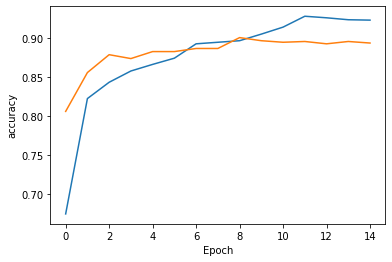

In [ ]:
# SOLUTION
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

By unfreezing the last convolutional layers of the pre-trained VGG16 and training the model for 50 more epochs, we achieved even better accuracy. We have now 0.89 on the testing set.

### Discussion: What are the reasons why fine-tuning helped to improve the accuracy score.